In [2]:
# Python
import pandas as pd
from fbprophet import Prophet


In [13]:
# Python
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [14]:
df1=df[['Date','AveragePrice']]

In [15]:
df1.rename(columns = {'Date':'ds', 'AveragePrice':'y'}, inplace = True)

C:\Users\GURURAJAN\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
# Python
m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

ds
18609 2019-03-21
18610 2019-03-22
18611 2019-03-23
18612 2019-03-24
18613 2019-03-25

In [18]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds      yhat  yhat_lower  yhat_upper
18609 2019-03-21  1.086052    0.598581    1.610861
18610 2019-03-22  1.087055    0.561652    1.609583
18611 2019-03-23  1.088334    0.585213    1.609312
18612 2019-03-24  1.089870    0.579232    1.621085
18613 2019-03-25  1.091634    0.574788    1.586234

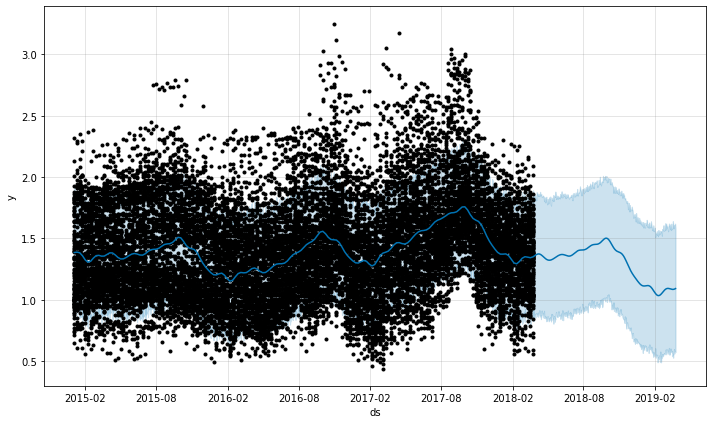

In [19]:
# Python
fig1 = m.plot(forecast)

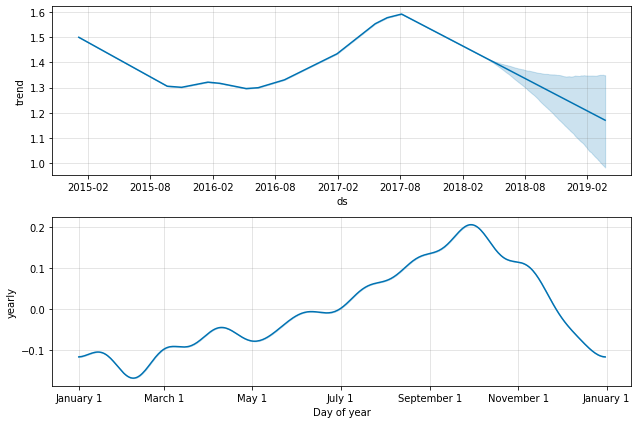

In [20]:
# Python
fig2 = m.plot_components(forecast)


In [21]:
# Python
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

# Validation

In [22]:
# Python
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-03-25 00:00:00 and 2017-03-25 00:00:00


ds      yhat  yhat_lower  yhat_upper     y     cutoff
0 2017-03-26  1.347677    0.832413    1.841033  1.41 2017-03-25
1 2017-03-26  1.347677    0.887924    1.850215  1.38 2017-03-25
2 2017-03-26  1.347677    0.853477    1.801837  0.77 2017-03-25
3 2017-03-26  1.347677    0.872353    1.831125  1.58 2017-03-25
4 2017-03-26  1.347677    0.859273    1.838317  1.16 2017-03-25

In [23]:
# Python
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 36 days  0.216476  0.465270  0.356314  0.232795  0.202241  0.736726
1 43 days  0.229536  0.479099  0.368783  0.237438  0.207741  0.740741
2 50 days  0.240515  0.490423  0.380269  0.241779  0.218135  0.732841
3 57 days  0.242691  0.492637  0.383812  0.241019  0.218135  0.723064
4 64 days  0.240660  0.490572  0.382078  0.237371  0.215014  0.727985

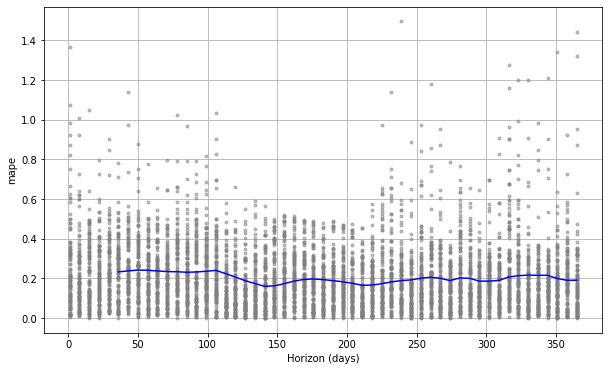

In [24]:
# Python
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
